In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('wines.csv')

In [3]:
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
y = df['Class']

In [5]:
y.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [6]:
y_cat = pd.get_dummies(y)

In [7]:
df.columns

Index(['Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash',
       'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       'OD280-OD315_of_diluted_wines', 'Proline'],
      dtype='object')

In [8]:
X = df.drop('Class' , axis=1)

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic_acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280-OD315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
dtypes: fl

In [10]:
import seaborn as sns

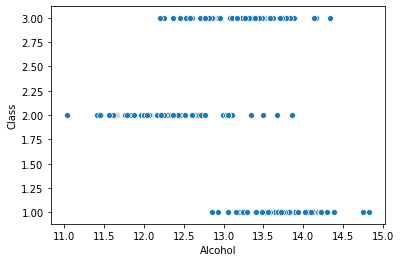

In [11]:
sns.scatterplot(x='Alcohol', y=y, data=df)

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [13]:
model = Sequential()

In [14]:
model.add(Dense(units=5, input_shape=(13,), activation='relu', kernel_initializer='he_normal'))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 70        
Total params: 70
Trainable params: 70
Non-trainable params: 0
_________________________________________________________________


In [16]:
# activation= 'relu'
# kernel_initializer = 'glossot' by default

In [17]:
model.add(Dense(units=8, activation='relu', kernel_initializer='he_normal'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 70        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 48        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.add(Dense(units=2, activation='relu', kernel_initializer='he_normal'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 70        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 48        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 18        
Total params: 136
Trainable params: 136
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Create output layer
# units=3 because there are three types of wines we have
model.add(Dense(units=3, activation='softmax'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 70        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 48        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 18        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 9         
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


In [23]:
# generally, we use optimizer=Adam, but we can use any as they all have same work
model.compile(optimizer=RMSprop(learning_rate=0.01), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
# metrics=['accuracy'] => used to check the accuracy of each epoch

In [25]:
model.layers

In [26]:
model.layers[1].input

<tf.Tensor 'dense_1/Relu:0' shape=(None, 5) dtype=float32>

In [27]:
model.layers[3].output

<tf.Tensor 'dense_4/Softmax:0' shape=(None, 3) dtype=float32>

In [28]:
model.fit(X, y_cat, epochs=10)
# we didn't got any satisfiable results
# so we need to change the no. of layers or neurons in each layer

Epoch 1/10
178/178 [==============================] - 0s 521us/step - loss: 2.4634 - accuracy: 0.4045
Epoch 2/10
178/178 [==============================] - 0s 62us/step - loss: 1.0937 - accuracy: 0.3989
Epoch 3/10
178/178 [==============================] - 0s 56us/step - loss: 1.0911 - accuracy: 0.3989
Epoch 4/10
178/178 [==============================] - 0s 67us/step - loss: 1.0898 - accuracy: 0.3989
Epoch 5/10
178/178 [==============================] - 0s 62us/step - loss: 1.0888 - accuracy: 0.3989
Epoch 6/10
178/178 [==============================] - 0s 67us/step - loss: 1.0878 - accuracy: 0.3989
Epoch 7/10
178/178 [==============================] - 0s 90us/step - loss: 1.0878 - accuracy: 0.3989
Epoch 8/10
178/178 [==============================] - 0s 135us/step - loss: 1.0869 - accuracy: 0.3989
Epoch 9/10
178/178 [==============================] - 0s 84us/step - loss: 1.0872 - accuracy: 0.3989
Epoch 10/10
178/178 [==============================] - 0s 73us/step - loss: 1.0879 - accu

In [30]:
X.shape

(178, 13)

In [31]:
y_cat.shape

(178, 3)

In [32]:
# To clear weights and bias values 
import keras.backend as k
k.clear_session()

In [34]:
model.get_weights()

[array([[ 0.6057287 ,  0.4939317 , -0.01275026, -0.08549726,  0.215426  ],
        [ 0.589752  ,  0.05501368, -0.1744534 , -0.6562164 , -0.56785095],
        [-0.2786008 , -0.06965366, -0.08510949, -0.42297322, -0.1236966 ],
        [-0.0577263 ,  0.44029832,  0.72044414, -0.22286317, -0.91511786],
        [-0.29107964,  0.7691841 , -0.29577968,  0.05873987,  0.7004331 ],
        [-0.29302484,  0.09355734,  0.6175154 ,  0.03388499,  0.01247194],
        [ 0.10182647, -0.17534487, -0.01092505,  0.13251309, -0.49178877],
        [ 0.405375  , -0.6804193 ,  0.29564932, -0.02794911,  0.20602788],
        [-0.26308858,  0.10973123, -0.39624974,  0.36884788, -0.14341888],
        [ 0.5418936 , -0.5275922 ,  0.00748877, -0.11544162,  0.45909357],
        [ 0.05170601, -0.03377194, -0.5970016 , -0.07463953,  0.45351064],
        [-0.04910508,  0.8413696 ,  0.4463148 ,  0.68927246,  0.3305767 ],
        [-0.23287867, -0.07339387, -0.19943398,  0.15564615,  0.21218418]],
       dtype=float32),
 

In [ ]:
# save the model 
model.save('winesmodel.h5')

In [ ]:
# we can directly load the model anywhere
from keras.models import load_model
model = load_model('winesmodel.h5')